In [44]:
# 데이터 분리 및 모델 평가를 위한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import platform
# 한글 폰트 설정 코드
if platform.system() == 'Windows':
    # 맑은 고딕 폰트 사용
    font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
    plt.rc('axes', unicode_minus=False)  # 마이너스 기호 깨짐 방지
    print("한글 폰트 설정 완료: 맑은 고딕")


# 처리된 CSV 파일 로드
file_path = "c:\\Users\\wlsgh\\Downloads\\인공지능개론\\2주차\\titanic_processed.csv"
df = pd.read_csv(file_path)

# 데이터 미리보기
print("불러온 데이터 미리보기:")
print(df.head())
print(f"\n데이터 크기: {df.shape}")
print("\n데이터 정보:")
print(df.info())

# 특성(X)과 타겟(y) 분리
X = df.drop(['PassengerId', 'Survived'], axis=1)  # PassengerId는 예측에 불필요
y = df['Survived']

# 데이터 분할 (훈련 세트: 80%, 테스트 세트: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링 (SVM, KNN, 로지스틱 회귀에 중요)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 평가 함수 정의
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, use_scaling=True):
    # 스케일링 데이터 사용 여부
    if use_scaling:
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train
        X_test_model = X_test
        
    # 모델 학습
    model.fit(X_train_model, y_train)
    
    # 예측
    y_pred = model.predict(X_test_model)
    
    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)
    
    # 교차 검증 (CV=5)
    if use_scaling:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # 결과 출력
    print(f"===== {model_name} 결과 =====")
    print(f"정확도: {accuracy:.4f}")
    print(f"교차 검증 점수: {cv_scores}")
    print(f"평균 교차 검증 점수: {cv_scores.mean():.4f}")
    
    # 분류 리포트
    print("\n분류 보고서:")
    print(classification_report(y_test, y_pred))
    
    # 혼동 행렬 시각화
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} 혼동 행렬')
    plt.xlabel('예측 값')
    plt.ylabel('실제 값')
    plt.show()
    
    return accuracy, cv_scores.mean()

# 결과 저장용 딕셔너리
results = {}

한글 폰트 설정 완료: 맑은 고딕
불러온 데이터 미리보기:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin
0            1         0       3    1  22.0      1      0   7.2500    146
1            2         1       1    0  38.0      1      0  71.2833     81
2            3         1       3    0  26.0      0      0   7.9250    146
3            4         1       1    0  35.0      1      0  53.1000     55
4            5         0       3    1  35.0      0      0   8.0500    146

데이터 크기: (891, 9)

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare     



===== 데이터 탐색: 특성 간 산점도 =====


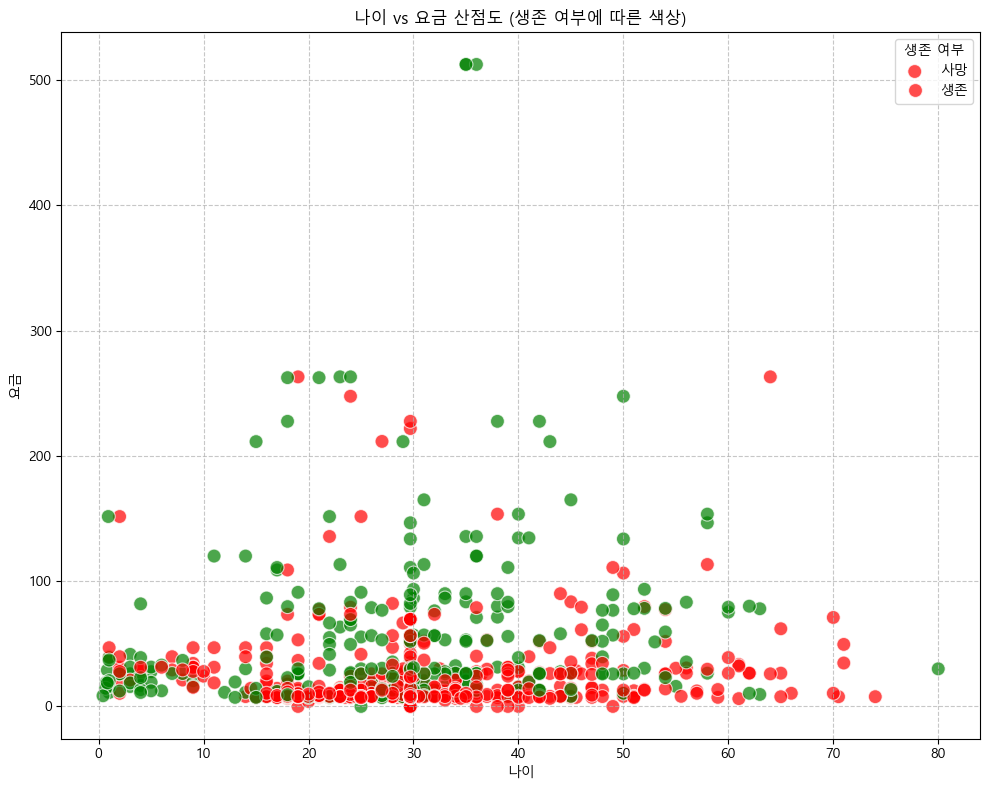

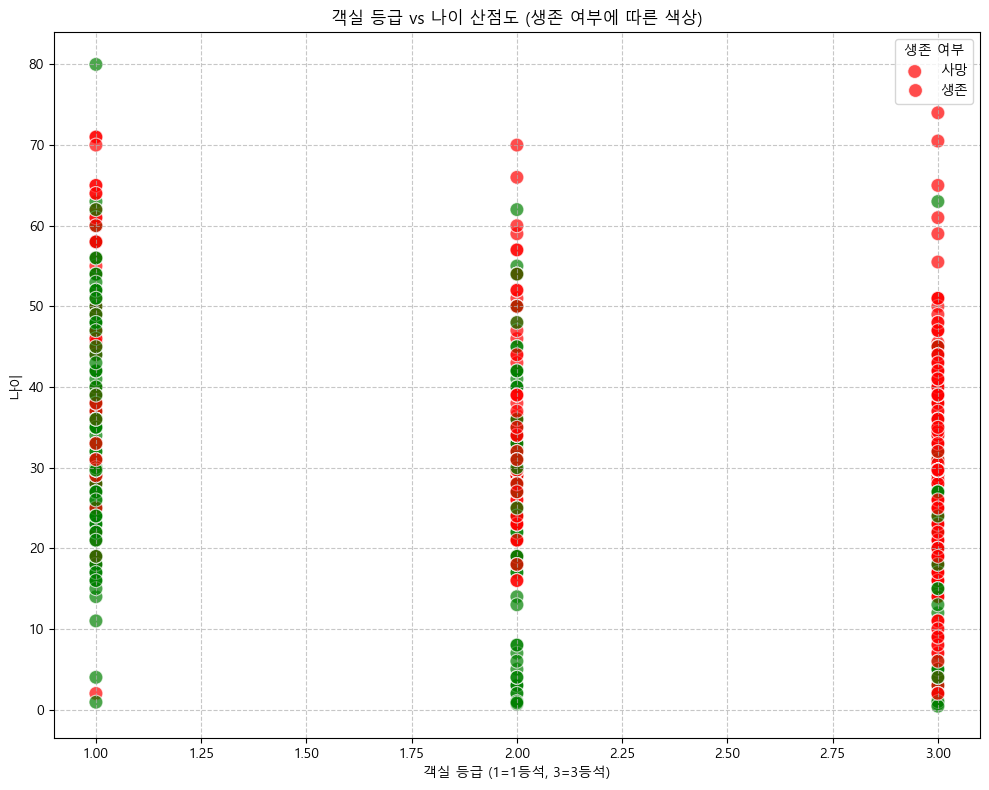

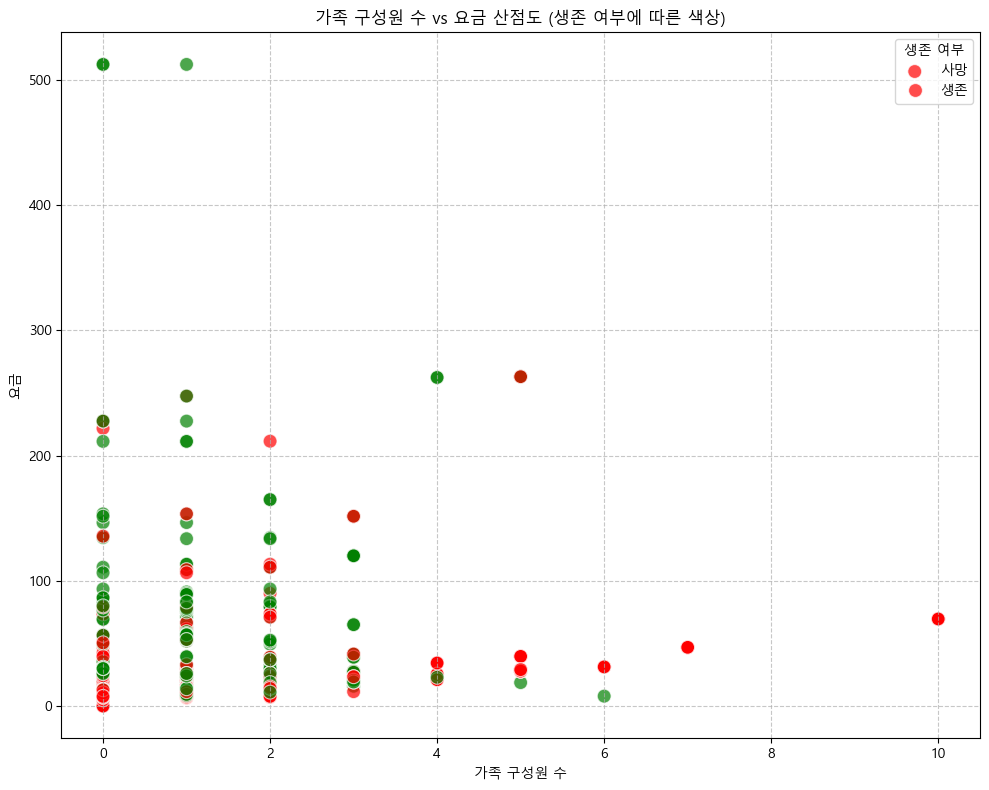

In [45]:
# 데이터 탐색을 위한 산점도 시각화
print("\n\n===== 데이터 탐색: 특성 간 산점도 =====")

# 주요 특성 간 산점도 (Age vs Fare)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette={0: 'red', 1: 'green'}, 
                s=100, alpha=0.7)
plt.title('나이 vs 요금 산점도 (생존 여부에 따른 색상)')
plt.xlabel('나이')
plt.ylabel('요금')
plt.legend(title='생존 여부', labels=['사망', '생존'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 다른 특성 간 산점도 (Pclass vs Age)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Pclass', y='Age', hue='Survived', data=df, palette={0: 'red', 1: 'green'}, 
                s=100, alpha=0.7)
plt.title('객실 등급 vs 나이 산점도 (생존 여부에 따른 색상)')
plt.xlabel('객실 등급 (1=1등석, 3=3등석)')
plt.ylabel('나이')
plt.legend(title='생존 여부', labels=['사망', '생존'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 가족 구성원 수와 생존 여부 관계 산점도
plt.figure(figsize=(10, 8))
# 가족 구성원 수 = SibSp(형제/배우자 수) + Parch(부모/자녀 수)
df['FamilySize'] = df['SibSp'] + df['Parch']
sns.scatterplot(x='FamilySize', y='Fare', hue='Survived', data=df, palette={0: 'red', 1: 'green'}, 
                s=100, alpha=0.7)
plt.title('가족 구성원 수 vs 요금 산점도 (생존 여부에 따른 색상)')
plt.xlabel('가족 구성원 수')
plt.ylabel('요금')
plt.legend(title='생존 여부', labels=['사망', '생존'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [46]:
# 모델 평가 함수 정의 (산점도 추가)
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, use_scaling=True):
    # 스케일링 데이터 사용 여부
    if use_scaling:
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train
        X_test_model = X_test
        
    # 모델 학습
    model.fit(X_train_model, y_train)
    
    # 예측
    y_pred = model.predict(X_test_model)
    
    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)
    
    # 교차 검증 (CV=5)
    if use_scaling:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # 결과 출력
    print(f"===== {model_name} 결과 =====")
    print(f"정확도: {accuracy:.4f}")
    print(f"교차 검증 점수: {cv_scores}")
    print(f"평균 교차 검증 점수: {cv_scores.mean():.4f}")
    
    # 분류 리포트
    print("\n분류 보고서:")
    print(classification_report(y_test, y_pred))
    
    # 혼동 행렬 시각화
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} 혼동 행렬')
    plt.xlabel('예측 값')
    plt.ylabel('실제 값')
    plt.show()
    
    # 예측 결과 산점도 시각화 (2개 특성 선택)
    # 여기서는 Age와 Fare를 사용합니다
    plt.figure(figsize=(10, 8))
    
    # 테스트 데이터 준비
    X_test_df = pd.DataFrame(X_test.copy())
    X_test_df['예측'] = y_pred
    X_test_df['실제'] = y_test.values
    X_test_df['예측_정확성'] = X_test_df['예측'] == X_test_df['실제']
    
    # 올바른 예측과 잘못된 예측을 다른 마커로 표시
    correct_pred = X_test_df[X_test_df['예측_정확성'] == True]
    wrong_pred = X_test_df[X_test_df['예측_정확성'] == False]
    
    # 산점도 그리기
    plt.scatter(correct_pred['Age'], correct_pred['Fare'], c='blue', s=100, alpha=0.7, label='정확한 예측')
    plt.scatter(wrong_pred['Age'], wrong_pred['Fare'], c='red', s=100, alpha=0.7, label='잘못된 예측', marker='X')
    
    plt.title(f'{model_name} - 예측 결과 산점도 (나이 vs 요금)')
    plt.xlabel('나이')
    plt.ylabel('요금')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # 2차원 투영 산점도 (PCA 사용)
    from sklearn.decomposition import PCA
    
    # PCA로 데이터 차원 축소
    pca = PCA(n_components=2)
    X_test_pca = pca.fit_transform(X_test_model)
    
    # 시각화
    plt.figure(figsize=(10, 8))
    
    # 결과 데이터프레임 생성
    pca_df = pd.DataFrame({
        'PCA1': X_test_pca[:, 0],
        'PCA2': X_test_pca[:, 1],
        '실제': y_test.values,
        '예측': y_pred,
        '정확성': y_test.values == y_pred
    })
    
    # 실제 생존 여부에 따라 색상 구분, 예측 정확성에 따라 마커 구분
    correct = pca_df[pca_df['정확성'] == True]
    incorrect = pca_df[pca_df['정확성'] == False]
    
    # 생존자
    survivors_correct = correct[correct['실제'] == 1]
    survivors_incorrect = incorrect[incorrect['실제'] == 1]
    
    # 비생존자
    non_survivors_correct = correct[correct['실제'] == 0]
    non_survivors_incorrect = incorrect[incorrect['실제'] == 0]
    
    plt.scatter(survivors_correct['PCA1'], survivors_correct['PCA2'], 
                c='green', marker='o', s=100, alpha=0.7, label='생존자 (정확)')
    plt.scatter(survivors_incorrect['PCA1'], survivors_incorrect['PCA2'], 
                c='green', marker='X', s=100, alpha=0.7, label='생존자 (오류)')
    
    plt.scatter(non_survivors_correct['PCA1'], non_survivors_correct['PCA2'], 
                c='red', marker='o', s=100, alpha=0.7, label='비생존자 (정확)')
    plt.scatter(non_survivors_incorrect['PCA1'], non_survivors_incorrect['PCA2'], 
                c='red', marker='X', s=100, alpha=0.7, label='비생존자 (오류)')
    
    plt.title(f'{model_name} - PCA 차원 축소 산점도 (설명된 분산: {pca.explained_variance_ratio_.sum():.2f})')
    plt.xlabel('주성분 1')
    plt.ylabel('주성분 2')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    return accuracy, cv_scores.mean()



===== 로지스틱 회귀 모델 =====
===== 로지스틱 회귀 결과 =====
정확도: 0.8101
교차 검증 점수: [0.81818182 0.8041958  0.78873239 0.73943662 0.81690141]
평균 교차 검증 점수: 0.7935

분류 보고서:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



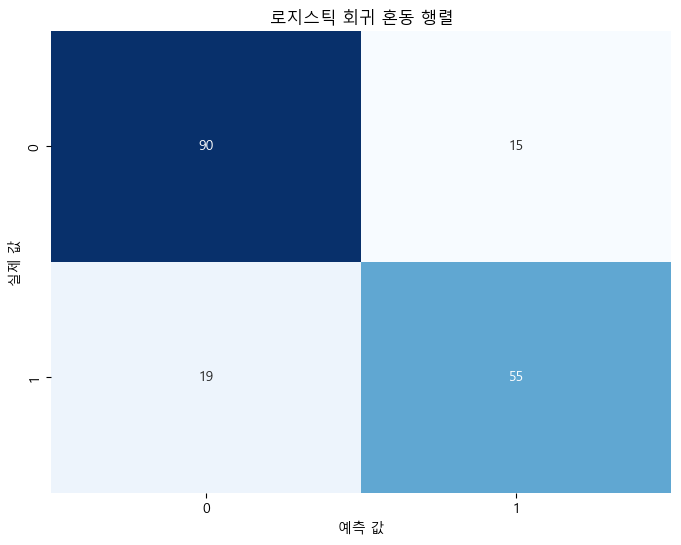

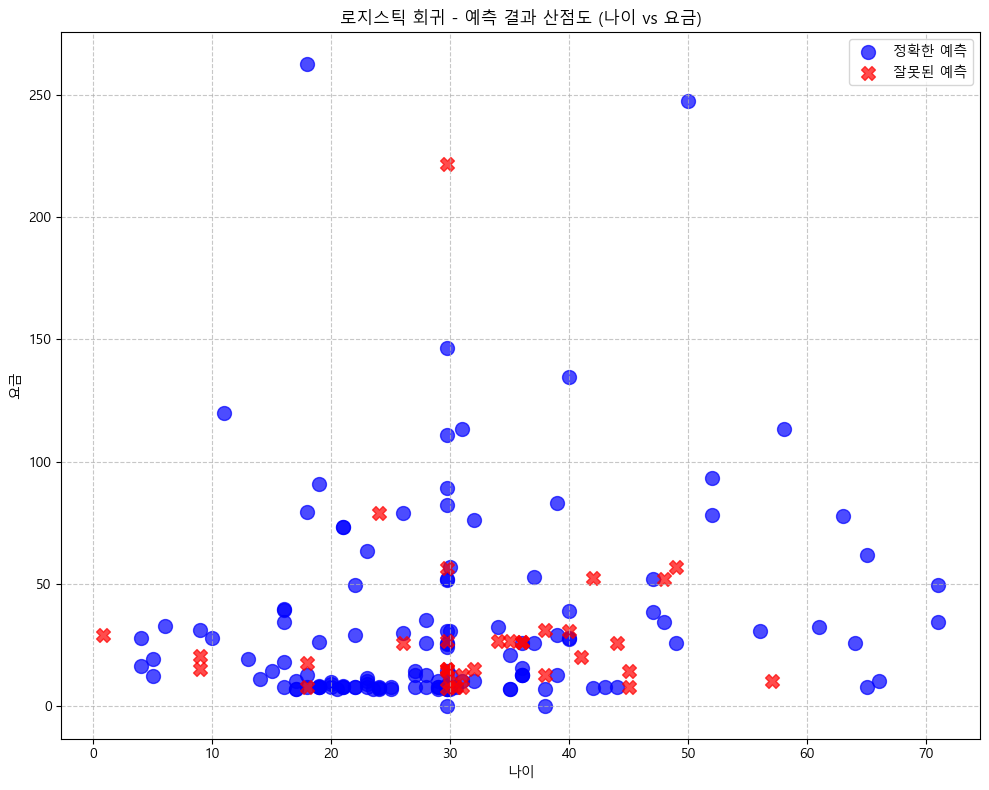

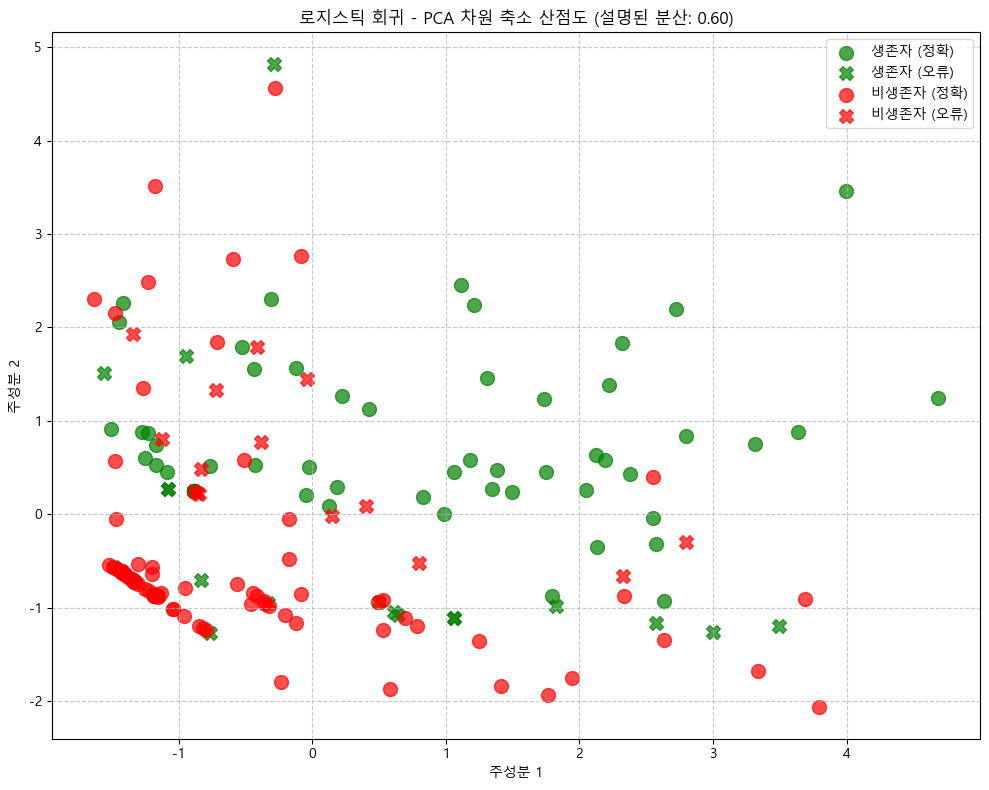

In [47]:
# 1. 로지스틱 회귀 모델
print("\n\n===== 로지스틱 회귀 모델 =====")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_accuracy, lr_cv = evaluate_model(lr_model, X_train, X_test, y_train, y_test, "로지스틱 회귀", use_scaling=True)
results["로지스틱 회귀"] = {"정확도": lr_accuracy, "교차 검증 점수": lr_cv}




===== SVM 모델 =====


===== SVM 결과 =====
정확도: 0.8101
교차 검증 점수: [0.84615385 0.83216783 0.8028169  0.80985915 0.81690141]
평균 교차 검증 점수: 0.8216

분류 보고서:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



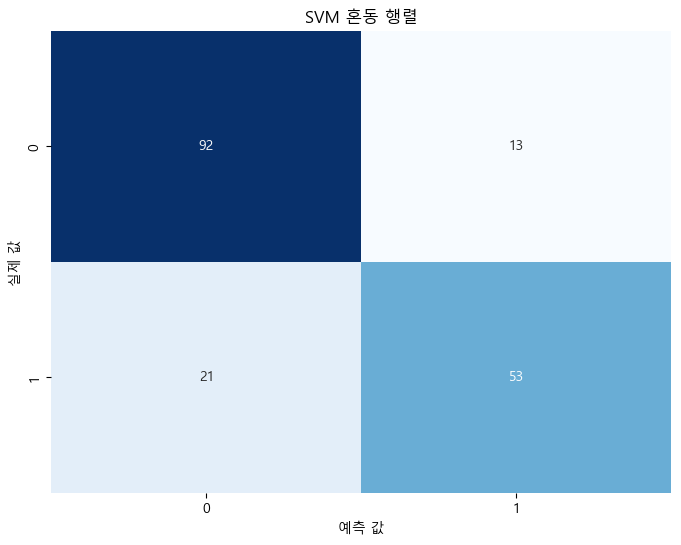

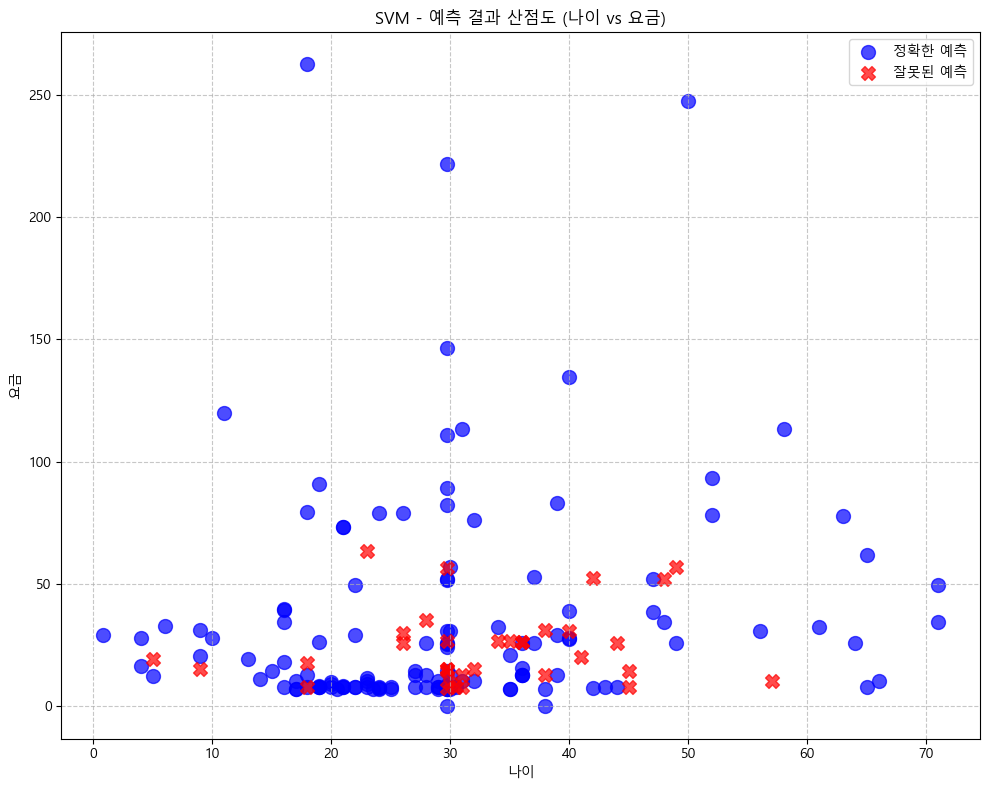

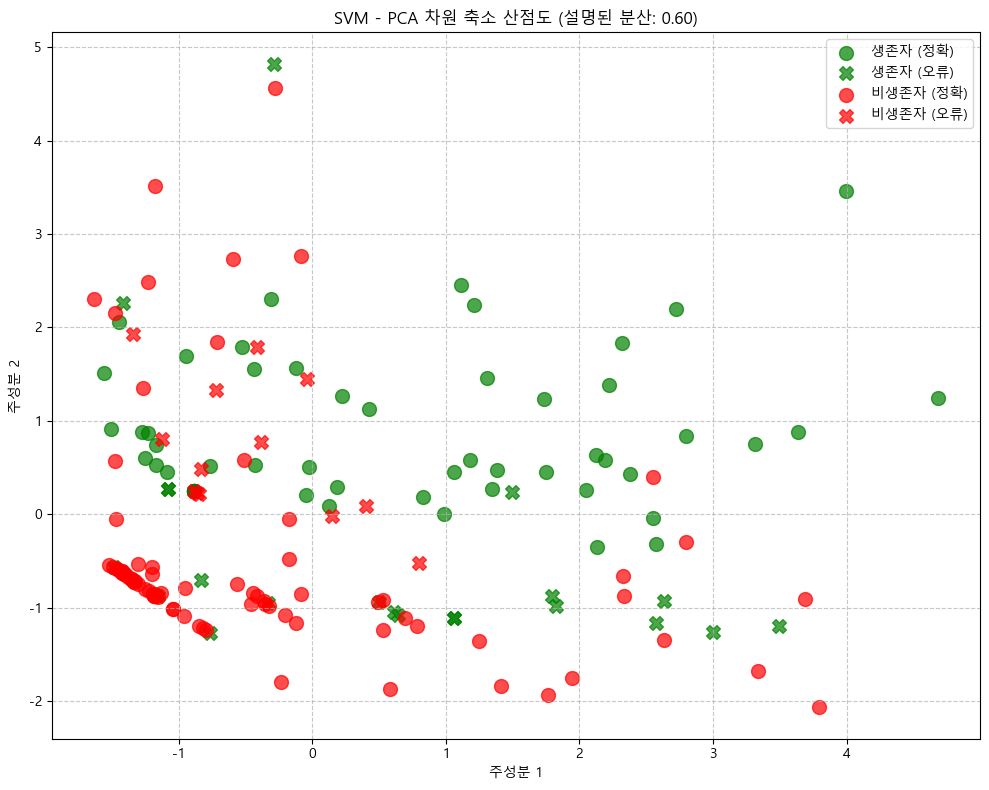

In [48]:
# 2. SVM 모델 (probability=True 옵션 추가)
print("\n\n===== SVM 모델 =====")
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_accuracy, svm_cv = evaluate_model(svm_model, X_train, X_test, y_train, y_test, "SVM", use_scaling=True)
results["SVM"] = {"정확도": svm_accuracy, "교차 검증 점수": svm_cv}



===== 의사결정 트리 모델 =====
===== 의사결정 트리 결과 =====
정확도: 0.7709
교차 검증 점수: [0.81818182 0.74125874 0.75352113 0.79577465 0.81690141]
평균 교차 검증 점수: 0.7851

분류 보고서:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.73      0.70      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



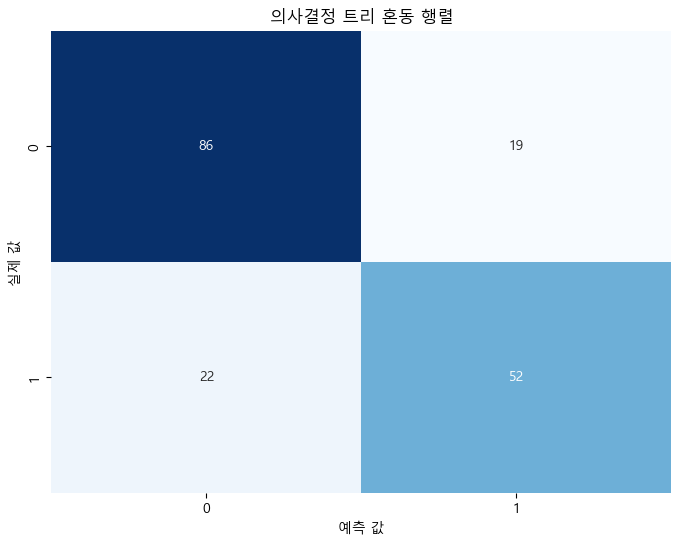

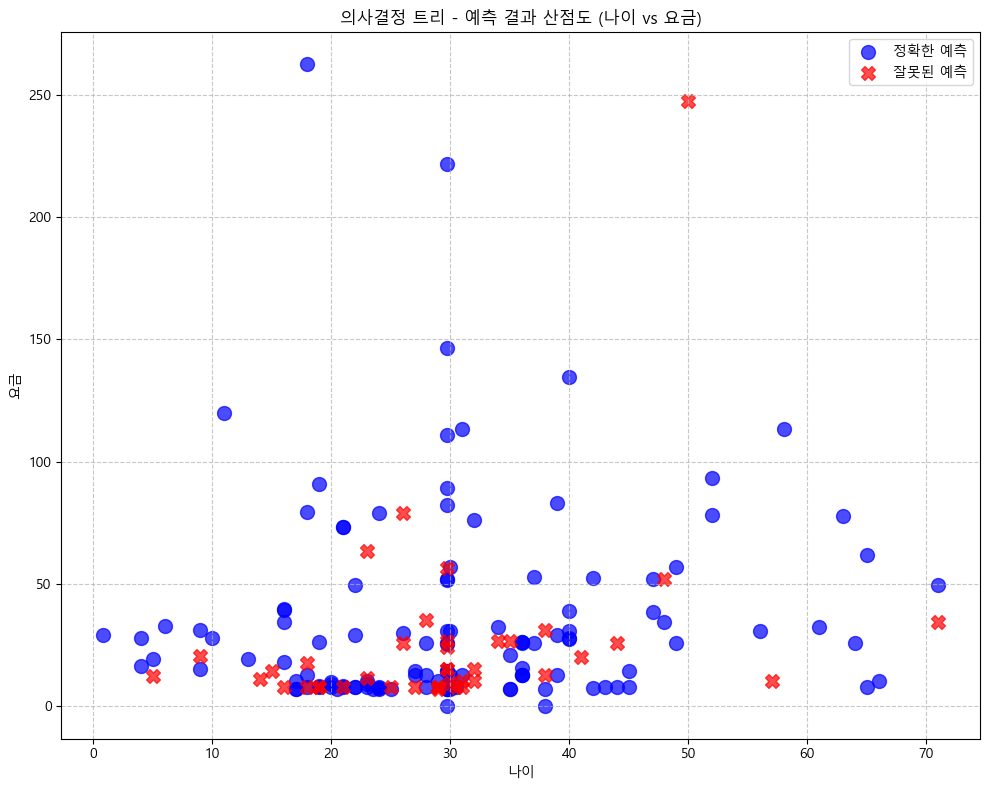

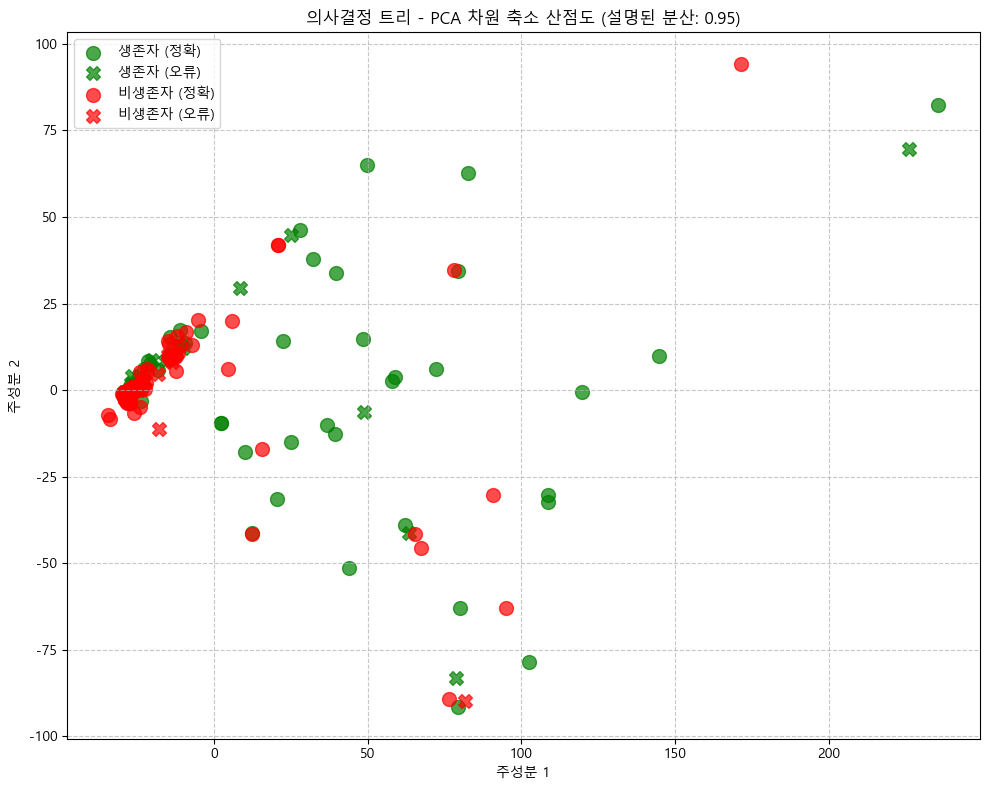

In [49]:
# 3. 의사결정 트리 모델
print("\n\n===== 의사결정 트리 모델 =====")
dt_model = DecisionTreeClassifier(random_state=42)
dt_accuracy, dt_cv = evaluate_model(dt_model, X_train, X_test, y_train, y_test, "의사결정 트리", use_scaling=False)
results["의사결정 트리"] = {"정확도": dt_accuracy, "교차 검증 점수": dt_cv}



===== 랜덤 포레스트 모델 =====
===== 랜덤 포레스트 결과 =====
정확도: 0.7933
교차 검증 점수: [0.81818182 0.7972028  0.80985915 0.81690141 0.83802817]
평균 교차 검증 점수: 0.8160

분류 보고서:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



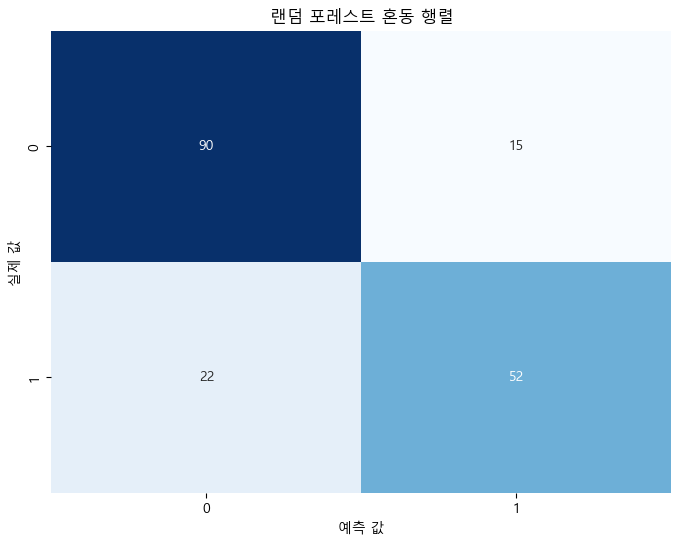

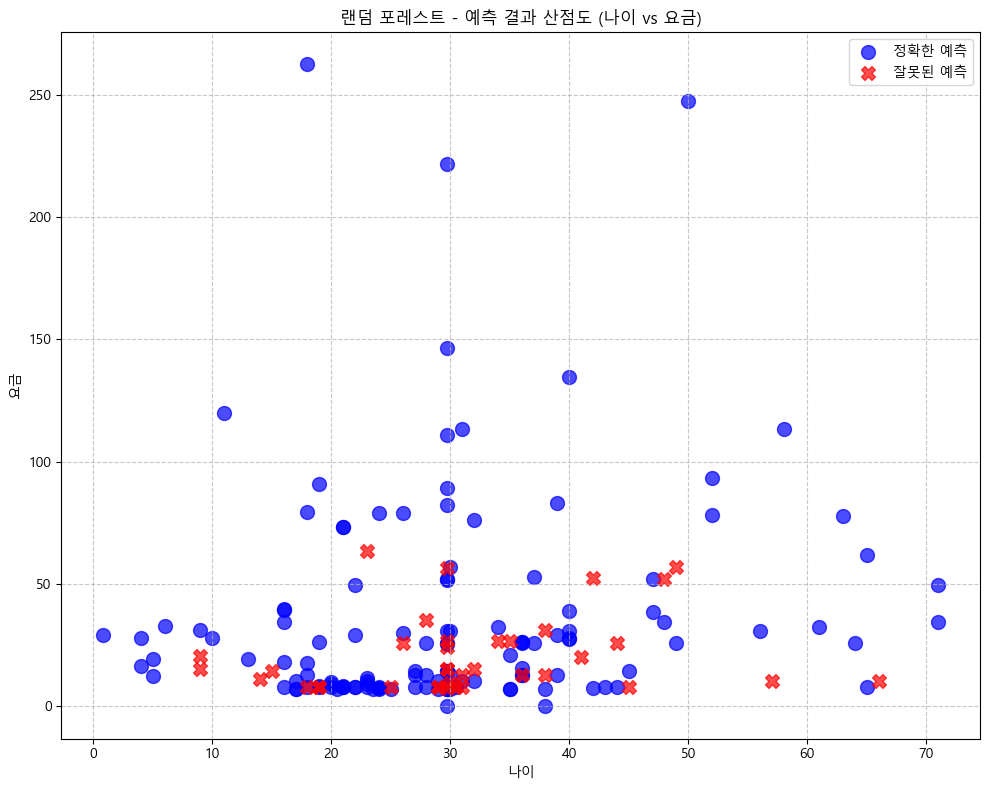

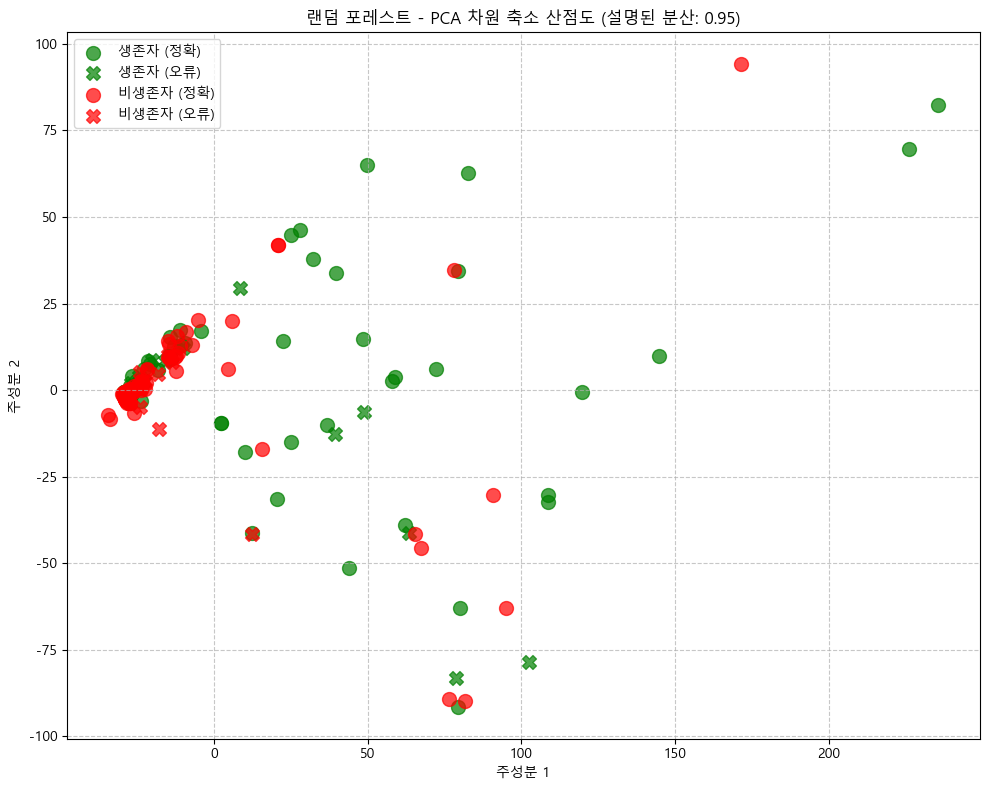

In [50]:
# 4. 랜덤 포레스트 모델
print("\n\n===== 랜덤 포레스트 모델 =====")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_accuracy, rf_cv = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "랜덤 포레스트", use_scaling=False)
results["랜덤 포레스트"] = {"정확도": rf_accuracy, "교차 검증 점수": rf_cv}



===== KNN 모델 =====
===== KNN 결과 =====
정확도: 0.7933
교차 검증 점수: [0.82517483 0.81818182 0.83098592 0.78169014 0.83098592]
평균 교차 검증 점수: 0.8174

분류 보고서:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



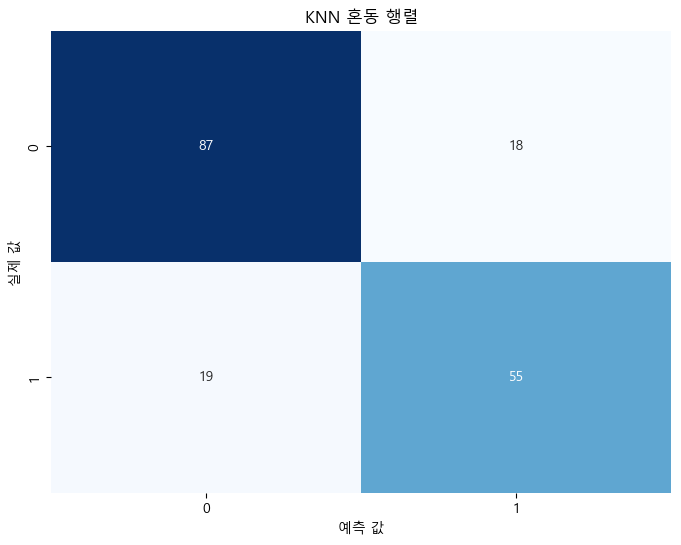

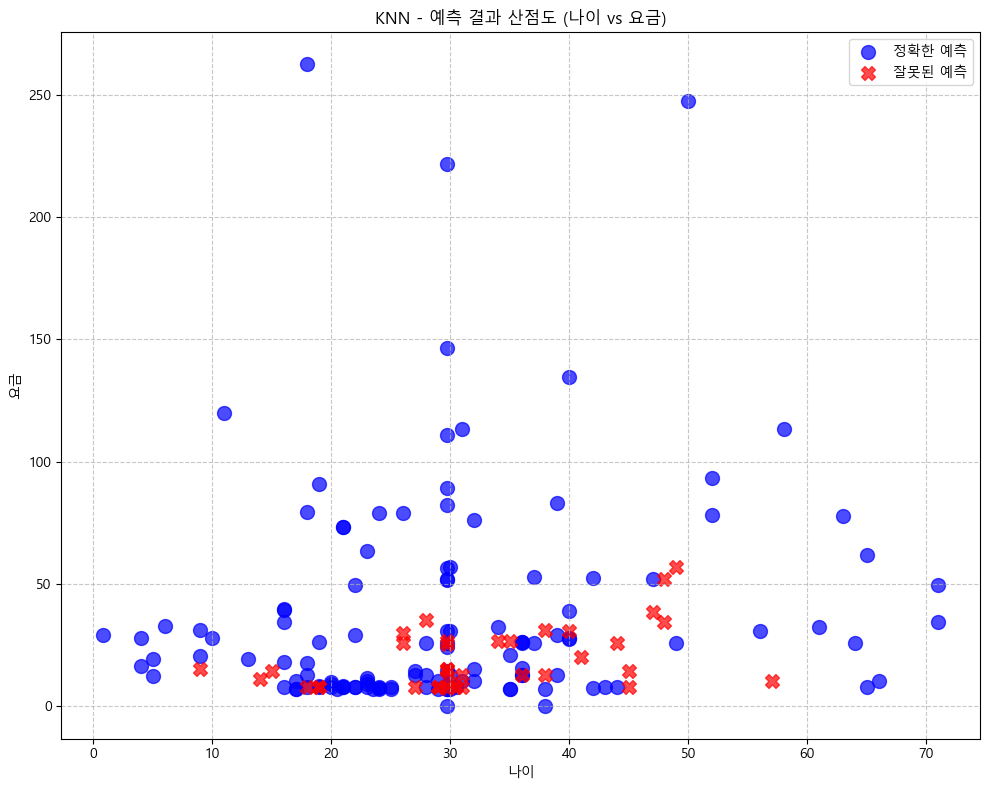

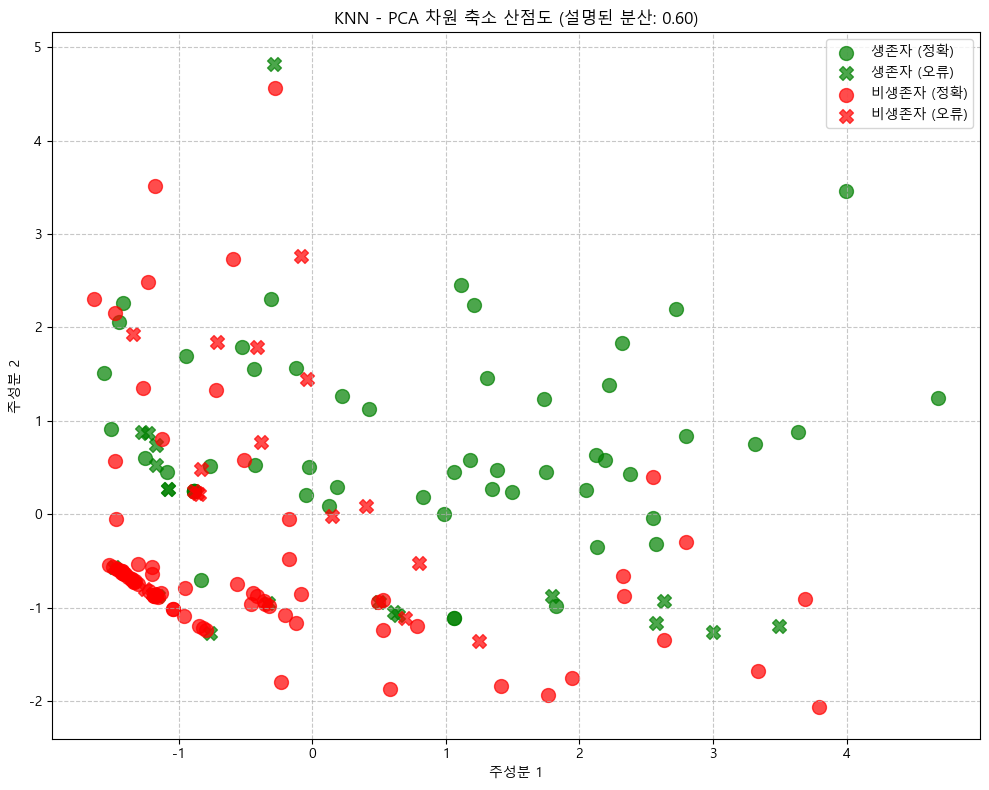

In [51]:
# 5. KNN 모델
print("\n\n===== KNN 모델 =====")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_accuracy, knn_cv = evaluate_model(knn_model, X_train, X_test, y_train, y_test, "KNN", use_scaling=True)
results["KNN"] = {"정확도": knn_accuracy, "교차 검증 점수": knn_cv}



===== 모델 성능 비교 =====
              정확도  교차 검증 점수
로지스틱 회귀  0.810056  0.793490
SVM      0.810056  0.821580
의사결정 트리  0.770950  0.785128
랜덤 포레스트  0.793296  0.816035
KNN      0.793296  0.817404


<Figure size 1000x600 with 0 Axes>

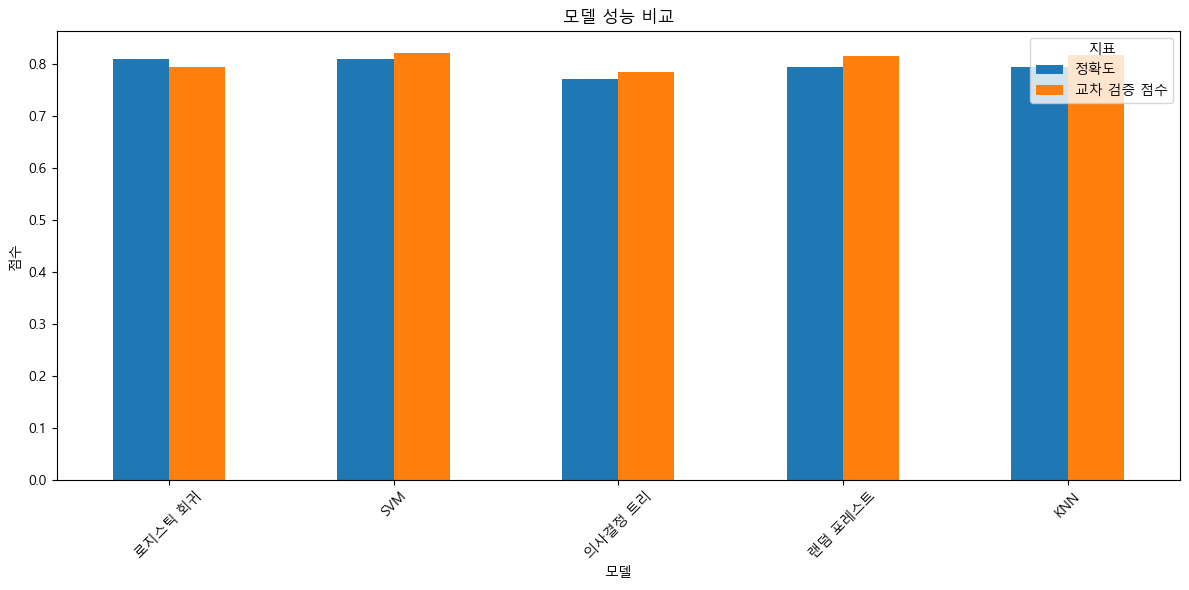

In [52]:
# 모델 성능 비교
results_df = pd.DataFrame(results).T
print("\n\n===== 모델 성능 비교 =====")
print(results_df)

# 성능 비교 시각화
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('모델 성능 비교')
plt.ylabel('점수')
plt.xlabel('모델')
plt.xticks(rotation=45)
plt.legend(title='지표')
plt.tight_layout()
plt.show()

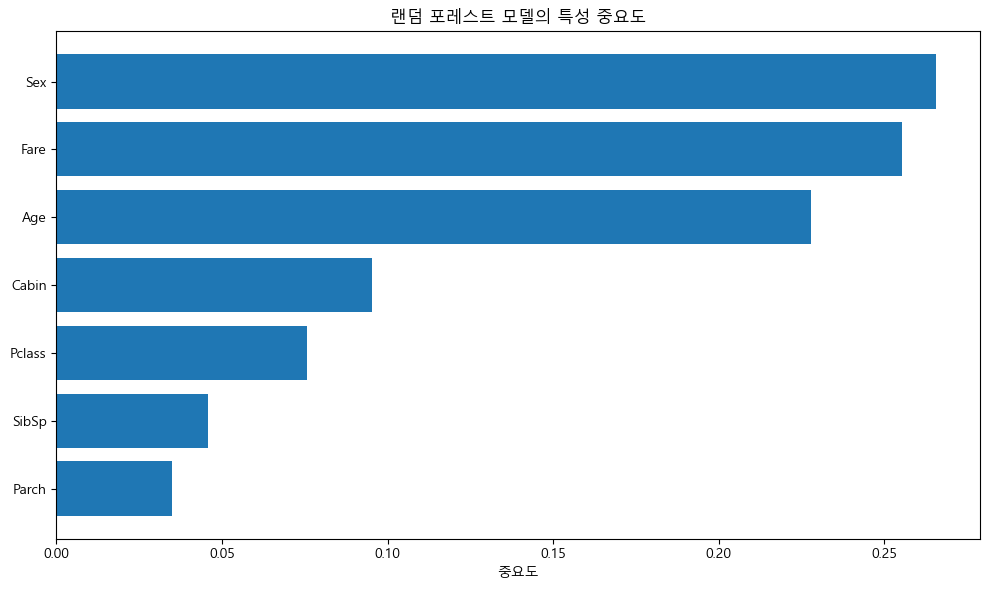



===== 결론 =====
가장 높은 정확도를 보인 모델: 로지스틱 회귀 (정확도: 0.8101)
가장 높은 교차 검증 점수를 보인 모델: SVM (교차 검증 점수: 0.8216)


In [53]:
# 특성 중요도 시각화 (트리 기반 모델)
plt.figure(figsize=(10, 6))
feature_importance = rf_model.feature_importances_
feature_names = X.columns
sorted_idx = feature_importance.argsort()

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('랜덤 포레스트 모델의 특성 중요도')
plt.xlabel('중요도')
plt.tight_layout()
plt.show()

# 결론 출력
print("\n\n===== 결론 =====")
best_model = results_df['정확도'].idxmax()
best_accuracy = results_df.loc[best_model, '정확도']
print(f"가장 높은 정확도를 보인 모델: {best_model} (정확도: {best_accuracy:.4f})")

best_cv_model = results_df['교차 검증 점수'].idxmax()
best_cv = results_df.loc[best_cv_model, '교차 검증 점수']
print(f"가장 높은 교차 검증 점수를 보인 모델: {best_cv_model} (교차 검증 점수: {best_cv:.4f})")



===== 모든 모델의 예측 결과 비교 =====


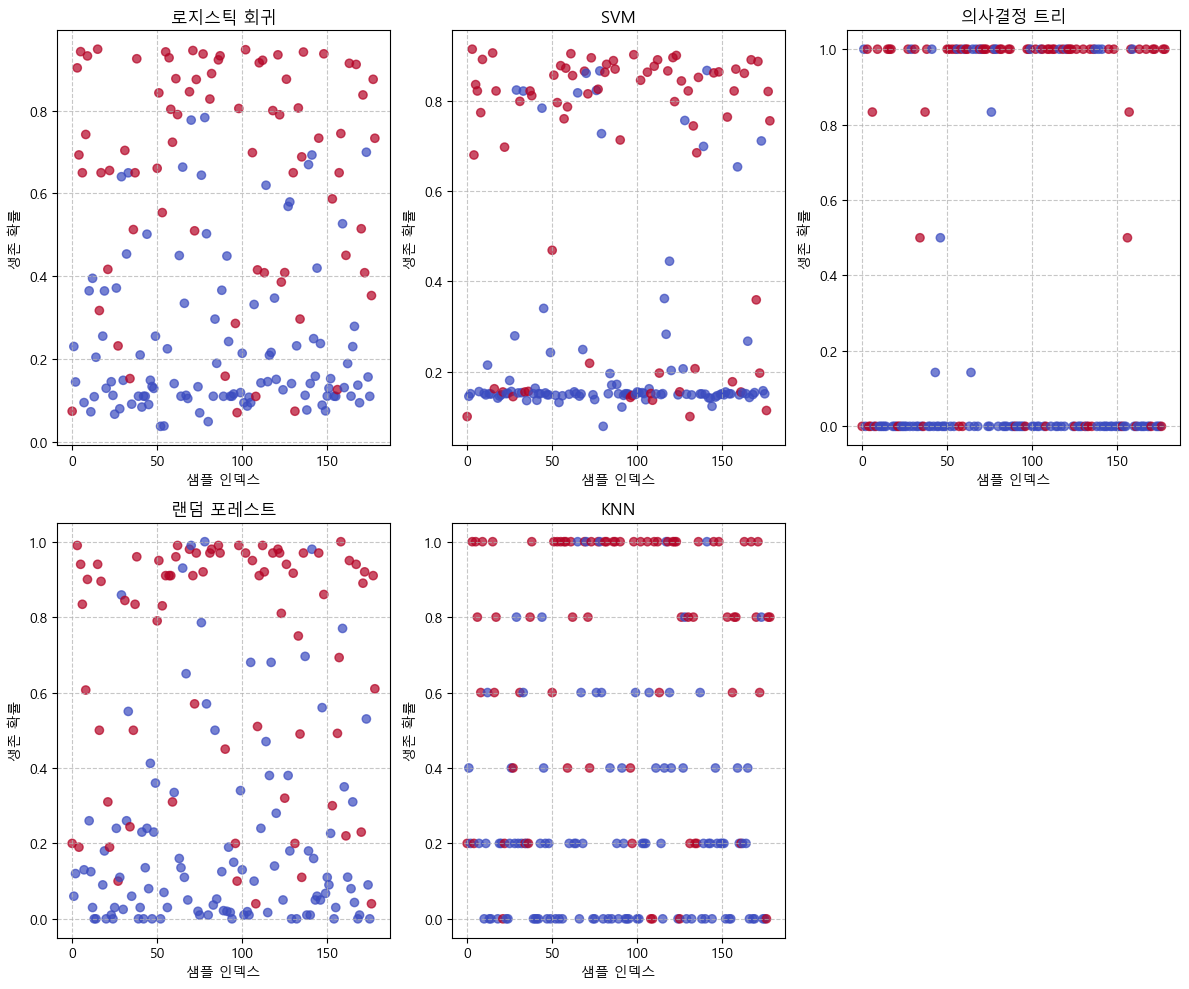

In [54]:
# 모든 모델의 예측 결과 비교 산점도
print("\n\n===== 모든 모델의 예측 결과 비교 =====")

# 모든 모델의 예측값 저장
# 각 모델에 대해 이전 코드 실행 후 아래 라인을 추가해야 합니다
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test_scaled)

# 예측 확률 계산 (SVM은 probability=True 옵션 필요)
try:
    y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
    y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
    y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
    y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
    y_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
    
    # 각 모델의 예측 확률을 산점도로 비교
    plt.figure(figsize=(12, 10))
    
    # 각 모델의 예측 확률 vs 실제 레이블
    plt.subplot(2, 3, 1)
    plt.scatter(range(len(y_test)), y_proba_lr, c=y_test, cmap='coolwarm', alpha=0.7)
    plt.title('로지스틱 회귀')
    plt.xlabel('샘플 인덱스')
    plt.ylabel('생존 확률')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.subplot(2, 3, 2)
    plt.scatter(range(len(y_test)), y_proba_svm, c=y_test, cmap='coolwarm', alpha=0.7)
    plt.title('SVM')
    plt.xlabel('샘플 인덱스')
    plt.ylabel('생존 확률')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.subplot(2, 3, 3)
    plt.scatter(range(len(y_test)), y_proba_dt, c=y_test, cmap='coolwarm', alpha=0.7)
    plt.title('의사결정 트리')
    plt.xlabel('샘플 인덱스')
    plt.ylabel('생존 확률')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.subplot(2, 3, 4)
    plt.scatter(range(len(y_test)), y_proba_rf, c=y_test, cmap='coolwarm', alpha=0.7)
    plt.title('랜덤 포레스트')
    plt.xlabel('샘플 인덱스')
    plt.ylabel('생존 확률')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.subplot(2, 3, 5)
    plt.scatter(range(len(y_test)), y_proba_knn, c=y_test, cmap='coolwarm', alpha=0.7)
    plt.title('KNN')
    plt.xlabel('샘플 인덱스')
    plt.ylabel('생존 확률')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
except:
    print("일부 모델에서 확률 예측을 지원하지 않아 산점도를 그릴 수 없습니다.")
    print("SVM 모델을 정의할 때 probability=True 옵션을 추가해주세요.")